# **Spotify Song Genre Prediction**
#### **DSCI 100 Section 007 Group 5**
#### **April 2023**

## Introduction

One of the world's most well-known music streaming services, Spotify offers a web API with the ability to collect several audio features for any song found on Spotify. In this project, we use a **[dataset](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)** created by Zaheen Hamidani using the Spotify API to pursue the viability of genre-based music sorting using audio features such as beats per minute, acoustics, and tempo.

**Inference Question:** Can a song's audio features be used to correctly classify its musical genre using a simple k-nearest neighbors (k-NN) classification model?

The predictor variables provided by Spotify are:
* track_id (unique identifier)
* popularity
* acousticness (measure of acoustic presence)
* danceability (0 to 1 of how danceable a song is)
* duration_ms (song duration in milliseconds)
* energy (measure of intensity and activity)
* instrumentalness (measure of whether a track contains no vocals or not)
* key (musical key)
* liveness (was this track played live at a venue?)
* loudness (decibels)
* mode (major or minor key)
* speechiness (amount of spoken words)
* tempo (beats per minute)
* time_signature
* valence (musical positiveness conveyed by a track)
    
More detailed variable descriptions are available from the Spotify API docs **[here](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)**

## Dataset and Workspace Setup

In [1]:
library(tidyverse)
library(GGally)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip

In [2]:
song_data <- read_csv("https://github.com/aidanmeharg/dsci-100-2022W2-group-5/raw/main/data/SpotifyFeatures.csv")

song_data <- song_data |>
    mutate(genre = as_factor(genre)) |> 
    mutate(key = as_factor(key)) |>
    mutate(time_signature = as_factor(time_signature)) |>
    mutate(mode = as_factor(mode))

song_data

Rows: 232725 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): genre, artist_name, track_name, track_id, key, mode, time_signature
dbl (11): popularity, acousticness, danceability, duration_ms, energy, instr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,8.80e-04,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.9010,0.517,166960,0.419,0.00e+00,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.2620,0.745,222442,0.704,0.00e+00,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.0973,0.758,323027,0.470,4.89e-05,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


### Check for Songs Classified Under Multiple Genres

copies,count
<int>,<int>
1,141650
2,21871
3,8091
4,3374
5,1300
6,358
7,124
8,6


[1] 176774

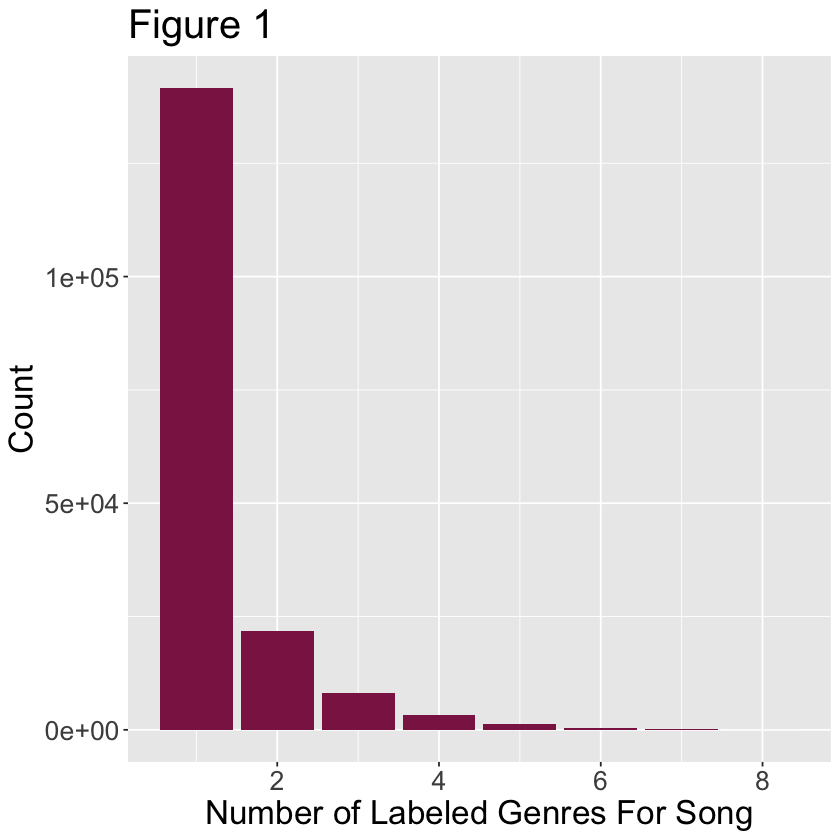

In [3]:
song_copies <- song_data |>
    group_by(track_id) |>
    summarize(copies = n()) |>
    arrange(desc(copies)) 

song_copy_counts <- song_copies |>
    group_by(copies) |>
    summarize(count = n())

num_unique_track_ids <- song_copy_counts |>
    select(count) |>
    pull() |>
    sum()

song_copy_counts
num_unique_track_ids

ggplot(song_copy_counts, aes(copies, count))+
    geom_bar(stat = "identity", fill = "violetred4")+
    labs(x = "Number of Labeled Genres For Song", y = "Count")+
    ggtitle("Figure 1")+
    theme(text = element_text(size = 20))

There are a total of 176,774 unique tracks in this dataset. Of those tracks, 141,650 (~80%) fall under a single genre classification while the rest appear in as many as eight different genres! Having songs that fall into multiple genres will complicate the classification process, so for this project we decided to only use songs with one assigned genre.

In [4]:
multi_genre_songs <- song_copies |>
    filter(copies > 1) |>
    select(track_id) |>
    pull()

song_data <- song_data |>
    filter(!(track_id %in% multi_genre_songs))

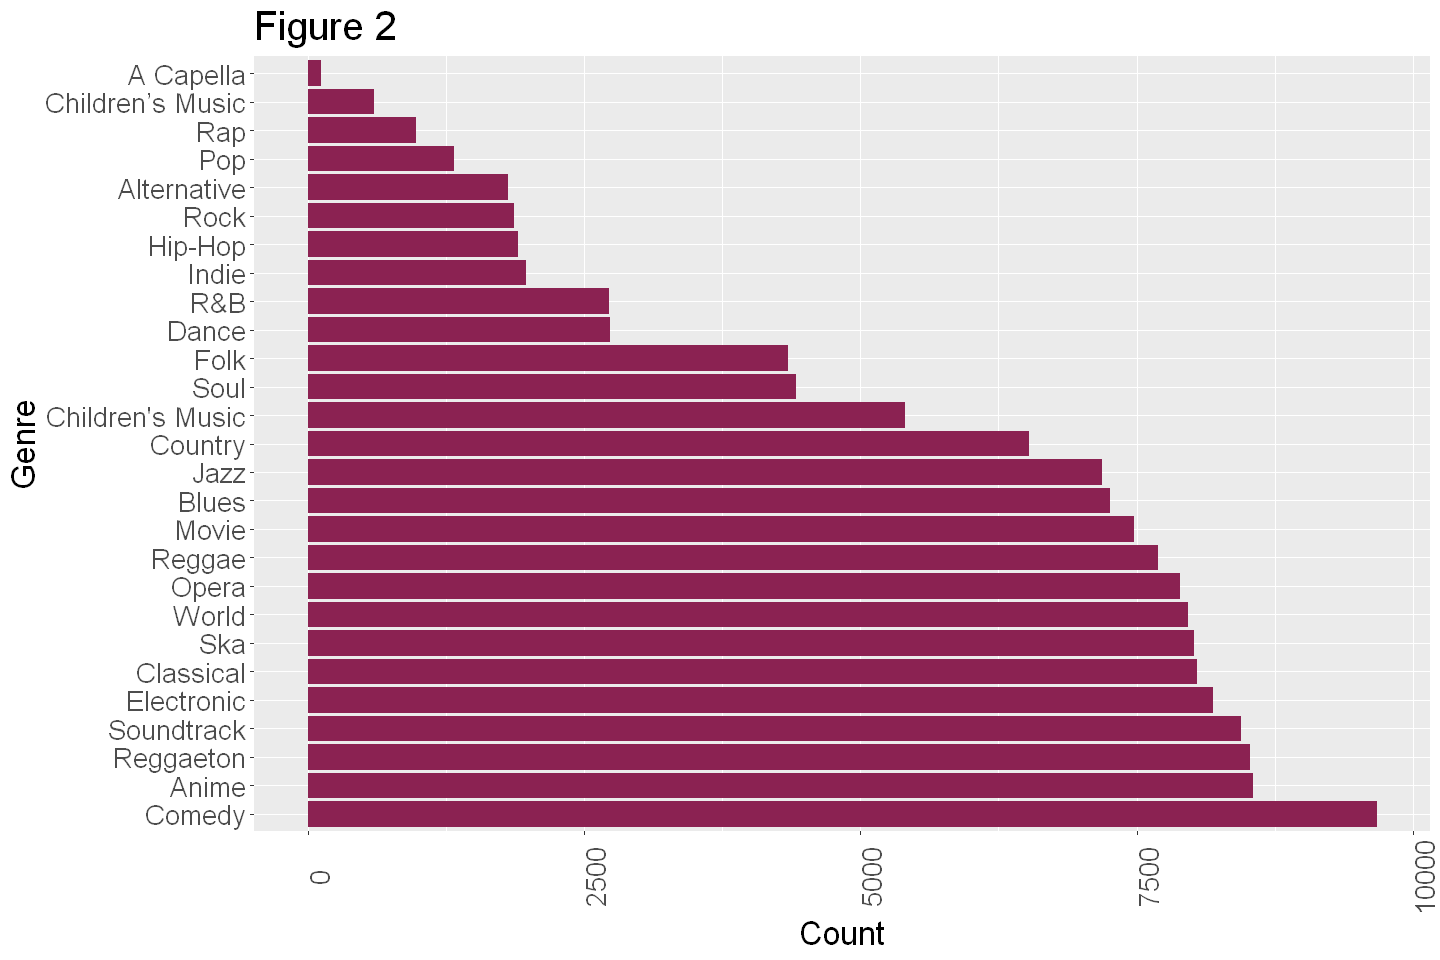

In [5]:
options(repr.plot.height = 8, repr.plot.width = 12)

genre_plot <- song_data |>
    group_by(genre) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count))+
        geom_bar(stat = "identity", fill = "violetred4")+
        labs(x = "Genre", y = "Count")+
        ggtitle("Figure 2")+
        coord_flip()+
        theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90))

genre_plot

As seen on the above graph there is a problem regarding the genre of Children's Music. It seems to be classified into two genres because of the apostrophe: one is Children's Music and the other is Children’s Music. We will correct this and put both of them under the same category as they should be. We also remove A Capella songs from our analysis entirely due to a very low number of observations.

In [5]:
#Checking how many songs and genres are in the data set
Original_number_Of_songs <-nrow(song_data)
Original_number_Of_Genere <- song_data |>
                            group_by(genre) |>
                            summarize(count = n()) |> 
                            nrow()
print(paste("Number of Rows of the original data set: ", Original_number_Of_songs))
print(paste("Number of genres of the original Data set: ", Original_number_Of_Genere))
#We select one of the two genre classify as children songs and mutate them to the other name of Children's Music
selectingOneTypeOfChildrensSong <- song_data |>
                                filter(genre=="Children’s Music") |>
                                mutate(genre=factor("Children's Music"))

#We delete that said genre from the original data set
song_data <- song_data |> 
            filter(genre!="Children’s Music")


[1] "Number of Rows of the original data set:  141650"
[1] "Number of genres of the original Data set:  27"


In [6]:
#We merge both of them into one data set
song_data <-add_row(song_data, selectingOneTypeOfChildrensSong)

#Confirm they have the same number of rows
New_number_of_songs<-nrow(song_data)
print(paste("Number of Rows of the new data set: ", New_number_of_songs))
#Confirm the have one genre less
New_number_Of_Genere <- song_data |>
                            group_by(genre) |>
                            summarize(count = n()) |>
                            nrow()
print(paste("Number of genres of the new Data set: ", New_number_Of_Genere))

[1] "Number of Rows of the new data set:  141650"
[1] "Number of genres of the new Data set:  26"


In [7]:
# Remove the A Capella songs (too few observations)
song_data <- song_data |>
    filter(genre != "A Capella")

## Training / Testing Split

For our analysis we will use a train/test split with 75/25 proportions.

**PLEASE RUN THE CELL BELOW TO SET RANDOM SEED**

In [8]:
set.seed(1738)

In [9]:
song_split <- initial_split(song_data, prop = 0.75, strata = genre)
song_train <- training(song_split)
song_test <- testing(song_split)
print(nrow(song_train))

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


[1] 106148


**Not sure why this warning message keeps occurring.**
We explore the proportions of genres in the full dataset and the training set below:

In [51]:
full_proportions <- song_data |>
    group_by(genre) |>
    summarize(full_dataset = n() / nrow(song_data)) 

train_proportions <- song_train |>
    group_by(genre) |>
    summarize(train_subset = n() / nrow(song_train)) 

proportion_table <- full_proportions |>
    inner_join(train_proportions, by = "genre") |>
    mutate(diff = full_dataset - train_subset) |>
    arrange(desc(full_dataset))

proportion_table |> slice(1:8) |> t()
proportion_table |> slice(9:16) |> t()
proportion_table |> slice(17:25) |> t()

genre,Comedy,Anime,Reggaeton,Soundtrack,Electronic,Classical,Ska,World
full_dataset,0.06834545,0.06045319,0.06024122,0.05967597,0.05783892,0.05682147,0.05663777,0.05624916
train_subset,0.06902627,0.06035912,0.06083958,0.05938878,0.05733504,0.05662848,0.05673211,0.05664732
diff,-6.808144e-04,9.406571e-05,-5.983632e-04,2.871941e-04,5.038770e-04,1.929928e-04,-9.434148e-05,-3.981616e-04


genre,Opera,Reggae,Movie,Blues,Jazz,Country,Children's Music,Soul
full_dataset,0.05575457,0.05432732,0.05285061,0.05126085,0.05076626,0.04611004,0.04243593,0.03121578
train_subset,0.05554509,0.05400950,0.05243622,0.05138109,0.05050496,0.04589818,0.04229001,0.03159739
diff,0.0002094817,0.0003178243,0.0004143911,-0.0001202360,0.0002613079,0.0002118596,0.0001459226,-0.0003816163


genre,Folk,Dance,R&B,Indie,Hip-Hop,Rock,Alternative,Pop,Rap
full_dataset,0.030678791,0.019345585,0.019253732,0.013947474,0.013445818,0.013177325,0.012838177,0.009390169,0.006938409
train_subset,0.030834307,0.019256133,0.019340920,0.014121792,0.013518860,0.013330444,0.012718092,0.009392546,0.006867770
diff,-1.555156e-04,8.945212e-05,-8.718783e-05,-1.743178e-04,-7.304293e-05,-1.531192e-04,1.200851e-04,-2.377318e-06,7.063972e-05


#### Table 2

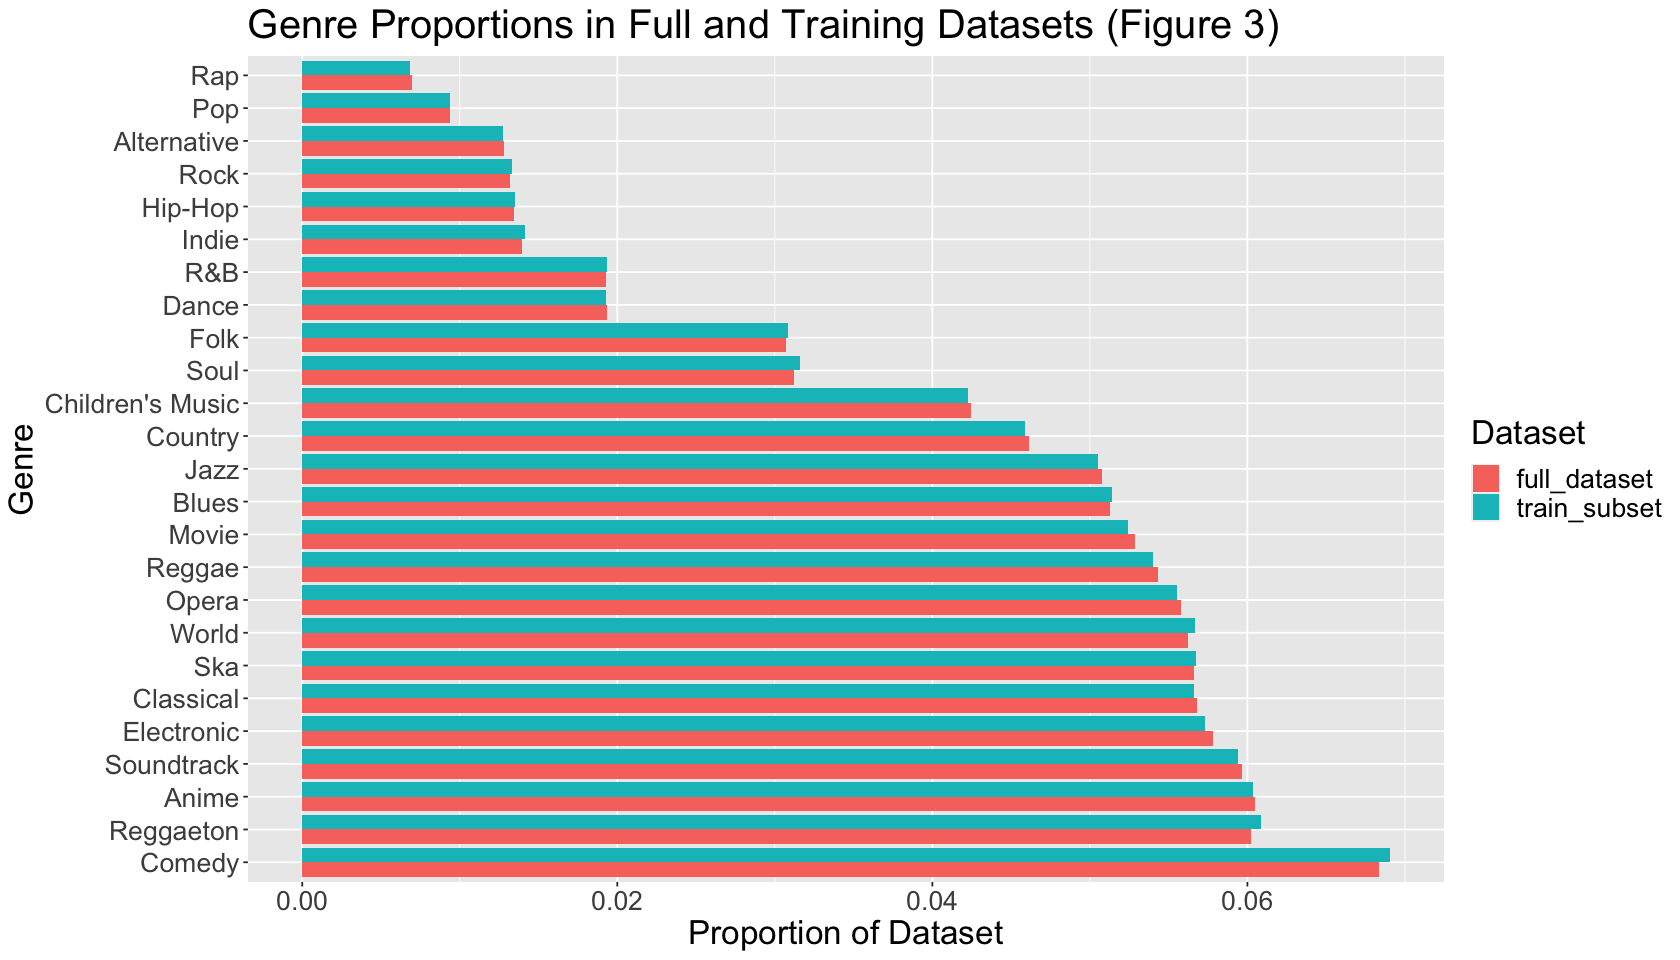

In [52]:
full_vs_training_strat <- proportion_table |> 
    select(-diff) |>
    pivot_longer(cols = -genre, names_to = "type", values_to = "amt") |>
    ggplot(aes(reorder(genre, -amt), amt, fill =  type)) +
         geom_bar(stat = "identity", position = "dodge") +
         labs(x = "Genre", y = "Proportion of Dataset", fill = "Dataset") +
         ggtitle("Genre Proportions in Full and Training Datasets (Figure 3)") +
         theme(text = element_text(size = 20)) +
         coord_flip() 

full_vs_training_strat

The train/test split appears to stratify genres quite well, so we are unsure what is causing the warning message: “Too little data to stratify.” There are several hundred observations in even the least frequent genres (eg rap, pop, etc.) which should be plenty for future cross validation splits.

## Exploratory Data Analysis

In [10]:
colSums(is.na(song_train))

genre      artist_name       track_name         track_id 
               0                0                0                0 
      popularity     acousticness     danceability      duration_ms 
               0                0                0                0 
          energy instrumentalness              key         liveness 
               0                0                0                0 
        loudness             mode      speechiness            tempo 
               0                0                0                0 
  time_signature          valence 
               0                0

There appear to be no missing (NA) values in our training set.

In [11]:
continuous_predictors <- song_train |>
    select(popularity:valence) |>
    select(-c("key", "mode", "time_signature")) 
summary_table <- apply(continuous_predictors, 2,  summary)
summary_table

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,0.00000,0.0000010,0.0569000,16316.0,0.0000980,0.0000000,0.010200,-52.45700,0.0222000,30.37900,0.0000000
1st Qu.,22.00000,0.0543000,0.3970000,173186.2,0.3090000,0.0000000,0.097600,-13.80900,0.0370000,91.13275,0.2070000
Median,33.00000,0.3550000,0.5460000,218667.0,0.5800000,0.0001110,0.132000,-8.64600,0.0491000,114.24400,0.4370000
Mean,32.01994,0.4365578,0.5286911,236980.8,0.5455903,0.1929402,0.234763,-10.64299,0.1351841,116.75850,0.4494912
3rd Qu.,43.00000,0.8310000,0.6740000,271673.8,0.7930000,0.1930000,0.292000,-5.76800,0.0995000,138.22500,0.6750000
Max.,97.00000,0.9960000,0.9890000,5488000.0,0.9990000,0.9990000,1.000000,1.61000,0.9670000,242.90300,1.0000000


#### Table 1

We can see that most of the continuous features created by spotify have been normalized via min-max scaling, as they are in the interval [0,1] (they have not been zero-centered however). Tempo, loudness, and duration have not been scaled or centered. Histograms are provided for each of the continuous predictors below (figure 4).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


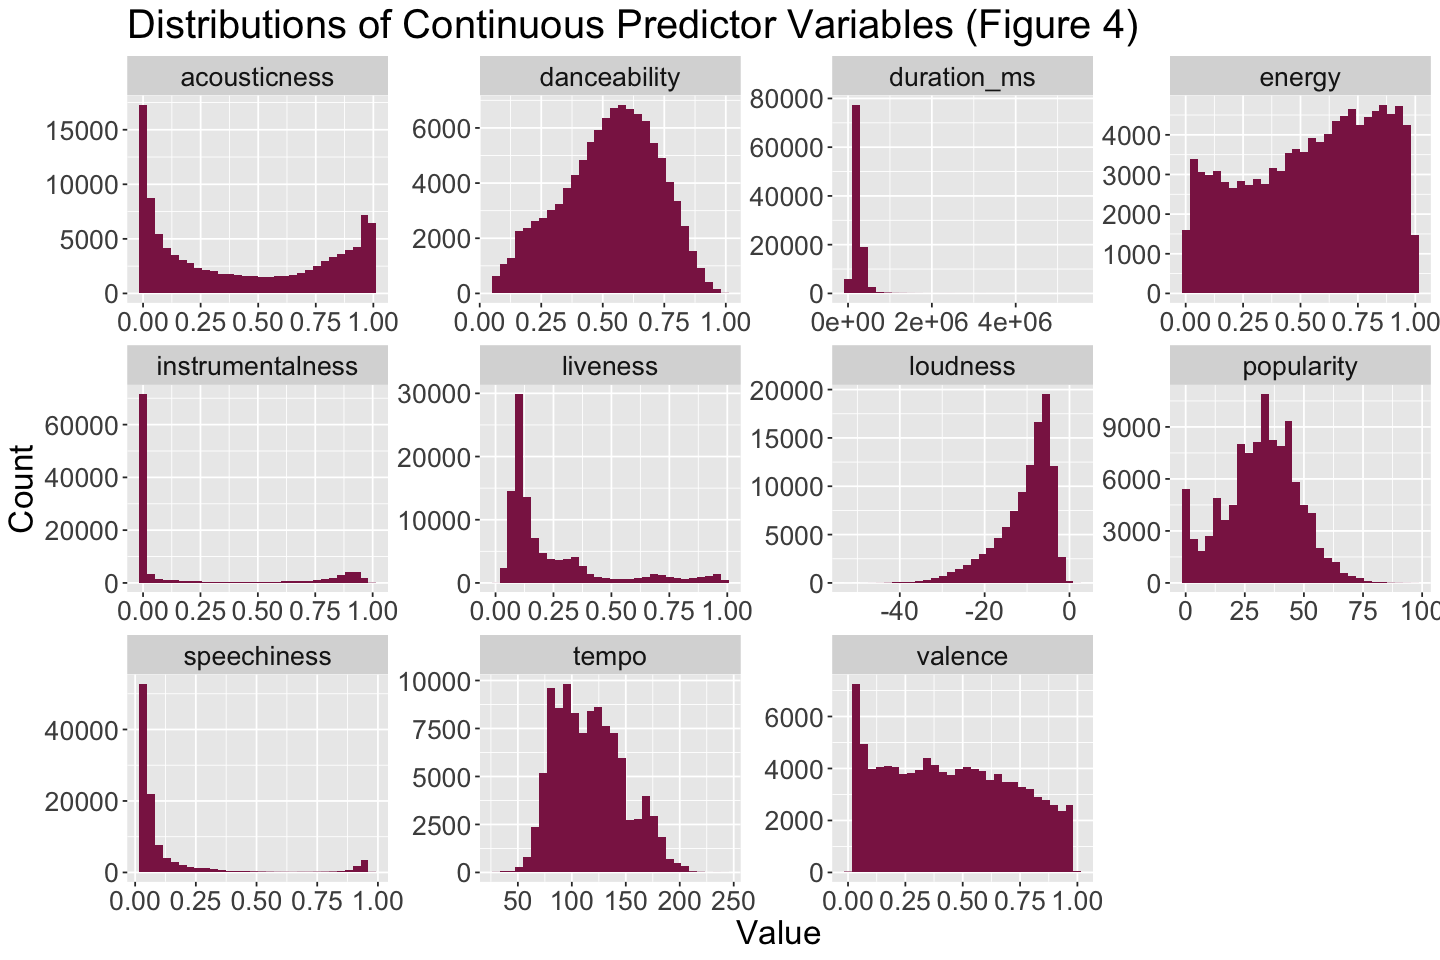

In [53]:
options(repr.plot.height = 8, repr.plot.width = 12)

continuous_long <- continuous_predictors |>
    pivot_longer(colnames(continuous_predictors))

density_plots <- continuous_long |>
    ggplot(aes(value)) +
        geom_histogram(fill = "violetred4") +
        facet_wrap(~name, scales = "free")+
        labs(x = "Value", y = "Count") +
        ggtitle("Distributions of Continuous Predictor Variables (Figure 4)") + 
        theme(text = element_text(size = 20))

density_plots

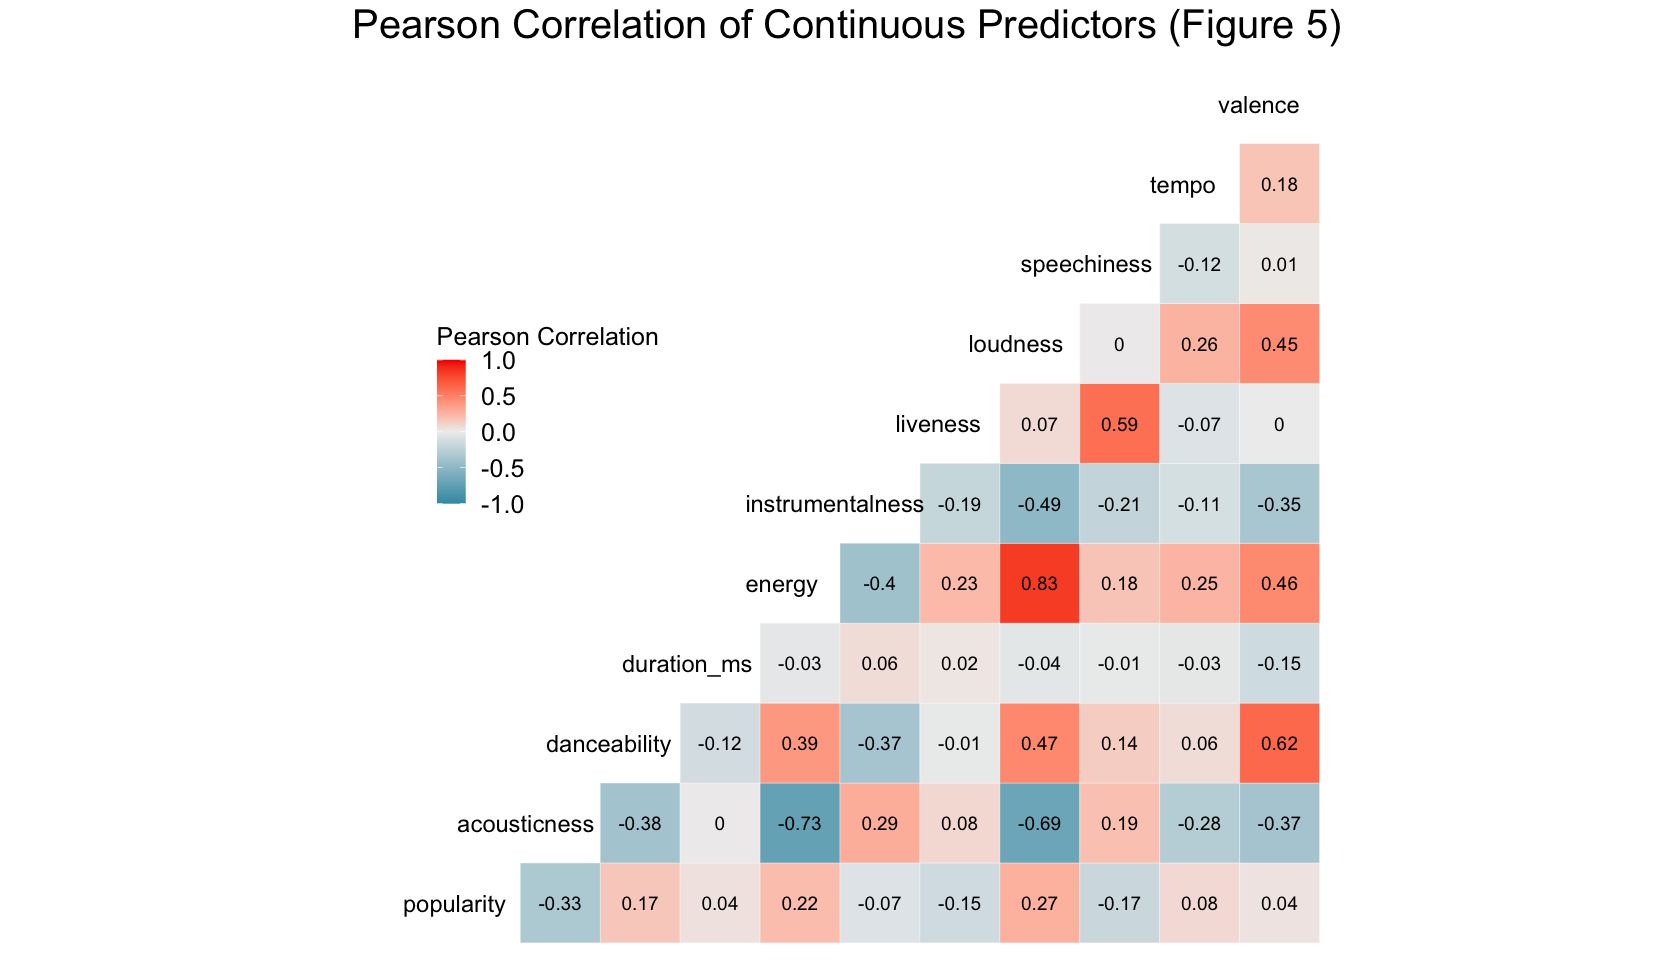

In [54]:
options(repr.plot.height = 8, repr.plot.width = 14)

ggcorr(continuous_predictors, method = c("pairwise", "pearson"), hjust = 0.75, size = 5, layout.exp = 1,
      label = TRUE, label_round = 2, legend.position = c(0.2, 0.6), name = "Pearson Correlation", legend.size = 15)+
        ggtitle("Pearson Correlation of Continuous Predictors (Figure 5)")+
        theme(text = element_text(size = 20))

The above correlation heatmap (Figure 4) displays Pearson correlation coefficients between each of the continuous predictors. We note that there is a strong positive correlation between loudness and energy (which makes sense). There are also moderately strong negative correlations between energy-acousticness and loudness-acousticness. We will keep this collinearity in mind if we want to reduce the number of predictors in the future.

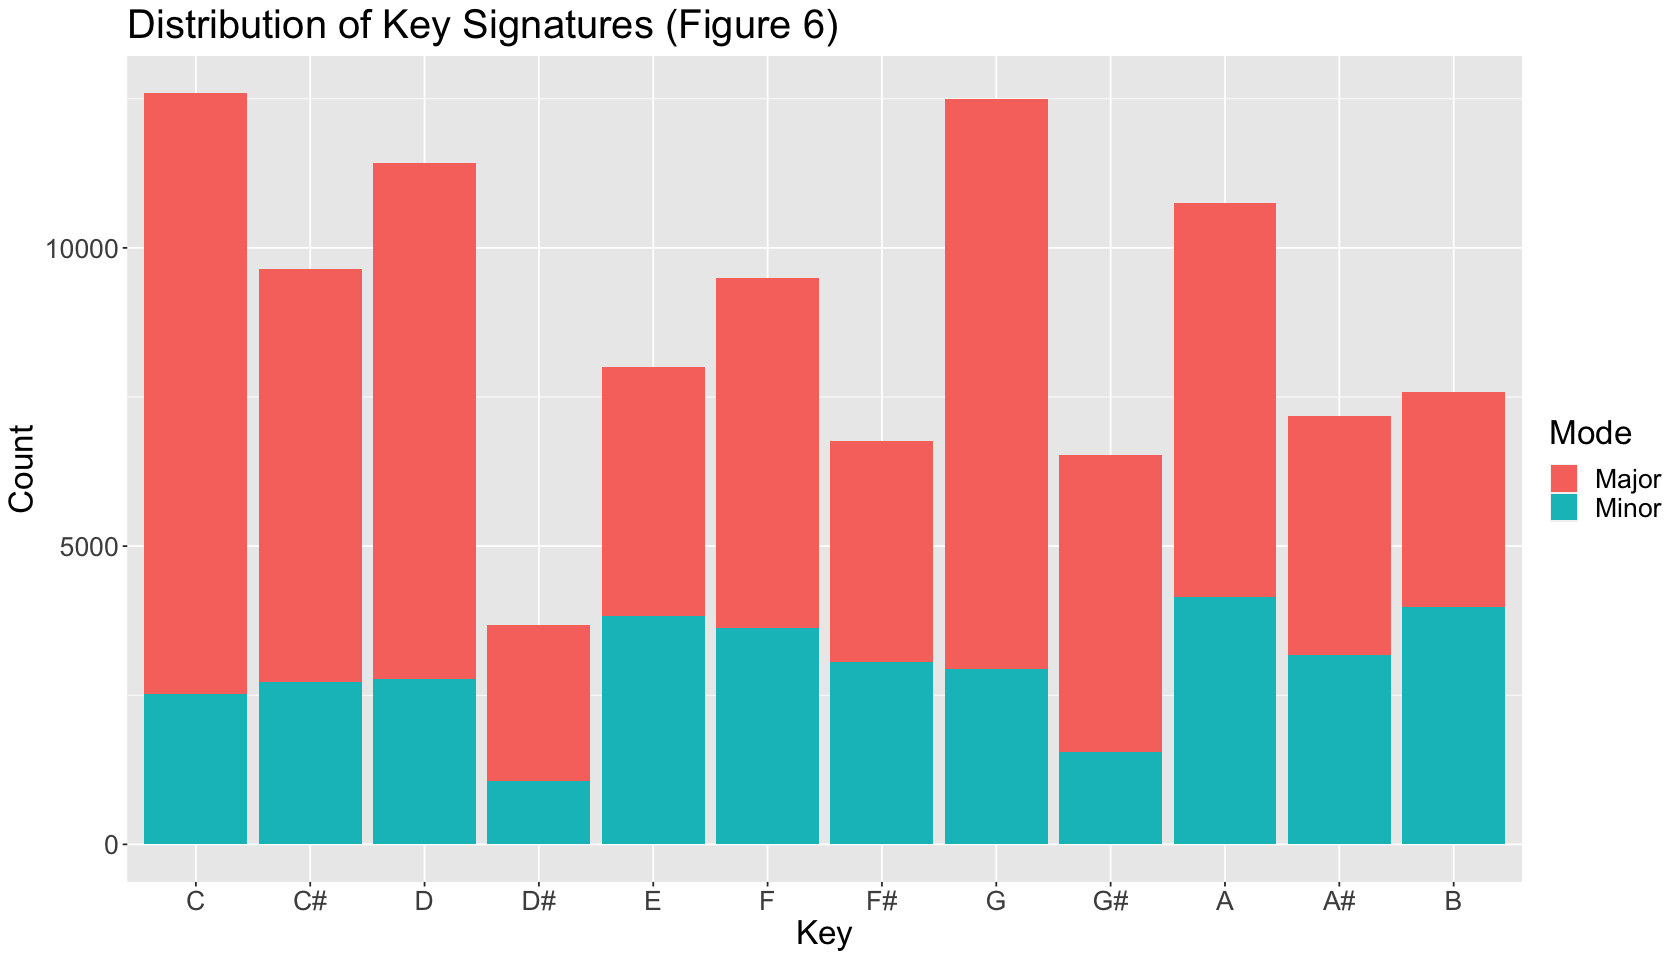

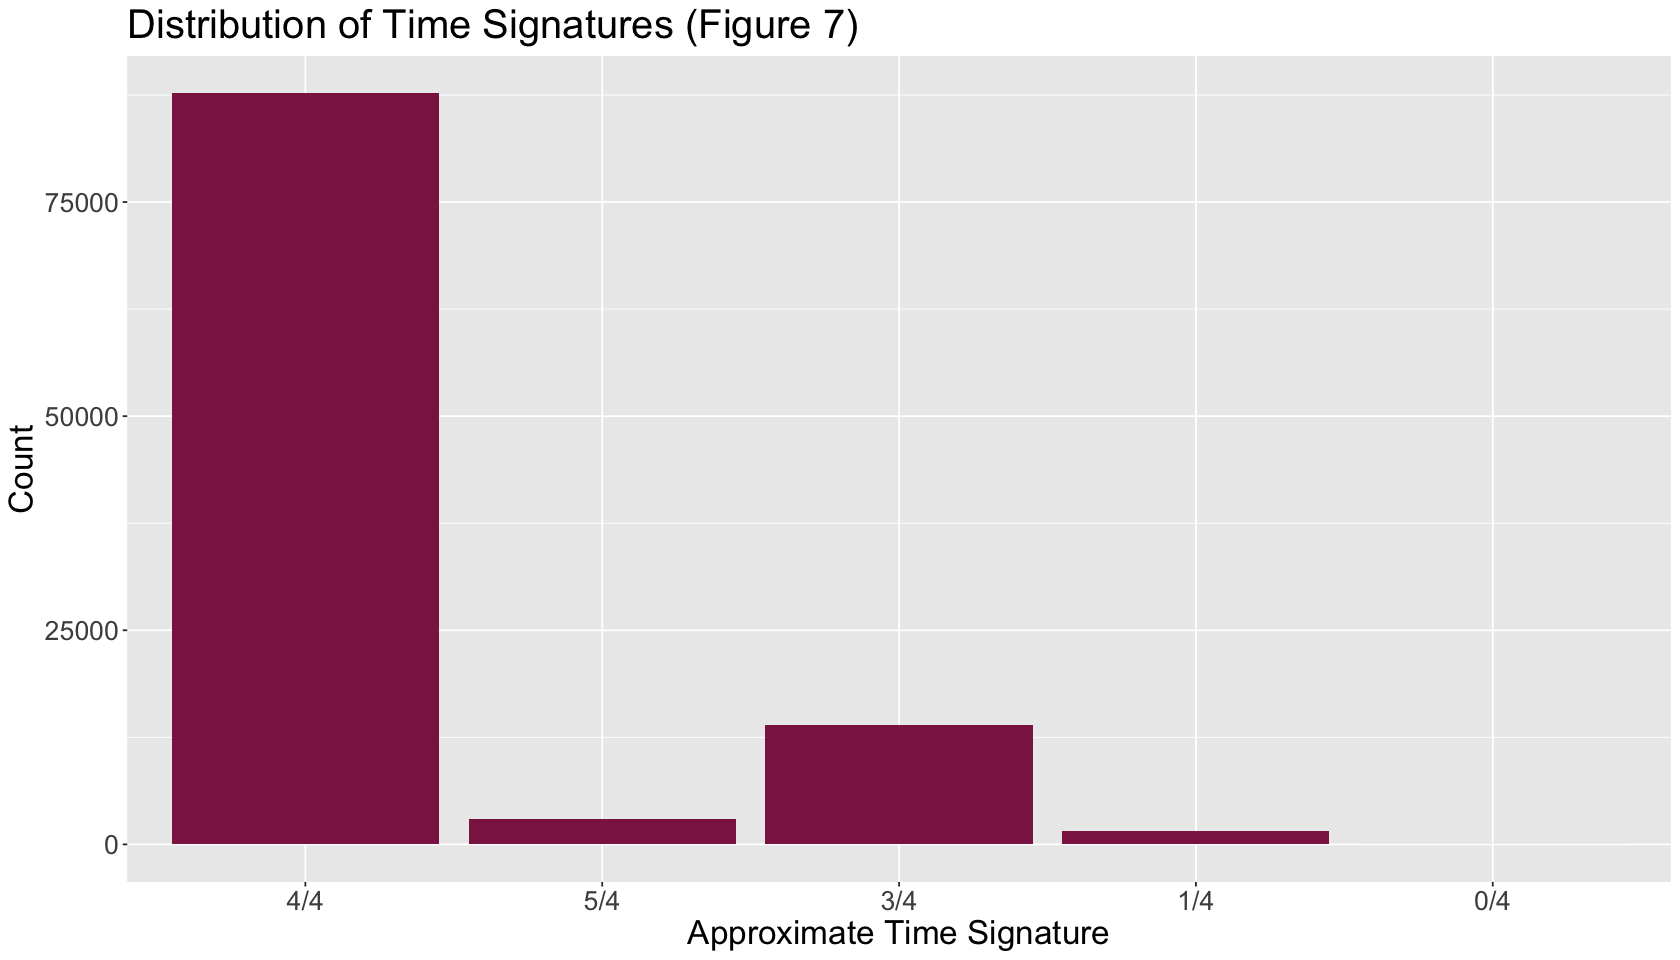

In [55]:
categorical_predictors <- song_train |>
    select(c("key", "mode", "time_signature"))

categorical_predictors$key <- fct_relevel(categorical_predictors$key, "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B")

key_plot <- categorical_predictors |>
    group_by(key, mode) |>
    tally() |>
    ggplot(aes(key, n, fill = mode)) +
        geom_bar(stat = "identity") +
        labs(x = "Key", y = "Count", fill = "Mode")+
        ggtitle("Distribution of Key Signatures (Figure 6)")+
        theme(text = element_text(size = 20))

time_sig_plot <- categorical_predictors |>
    group_by(time_signature) |>
    tally() |>
    ggplot(aes(time_signature, n)) +
        geom_bar(stat = "identity", fill = "violetred4") +
        labs(x = "Approximate Time Signature", y = "Count") +
        ggtitle("Distribution of Time Signatures (Figure 7)")+
        theme(text = element_text(size = 20))

key_plot

time_sig_plot

The description of time_signature from Spotify web API indicates that time signatures should range from 3/4 to 7/4, so it is concerning that there are some songs classified under 1/4. It is unclear what the dataset creator has done to alter the values obtained from the Spotify API.

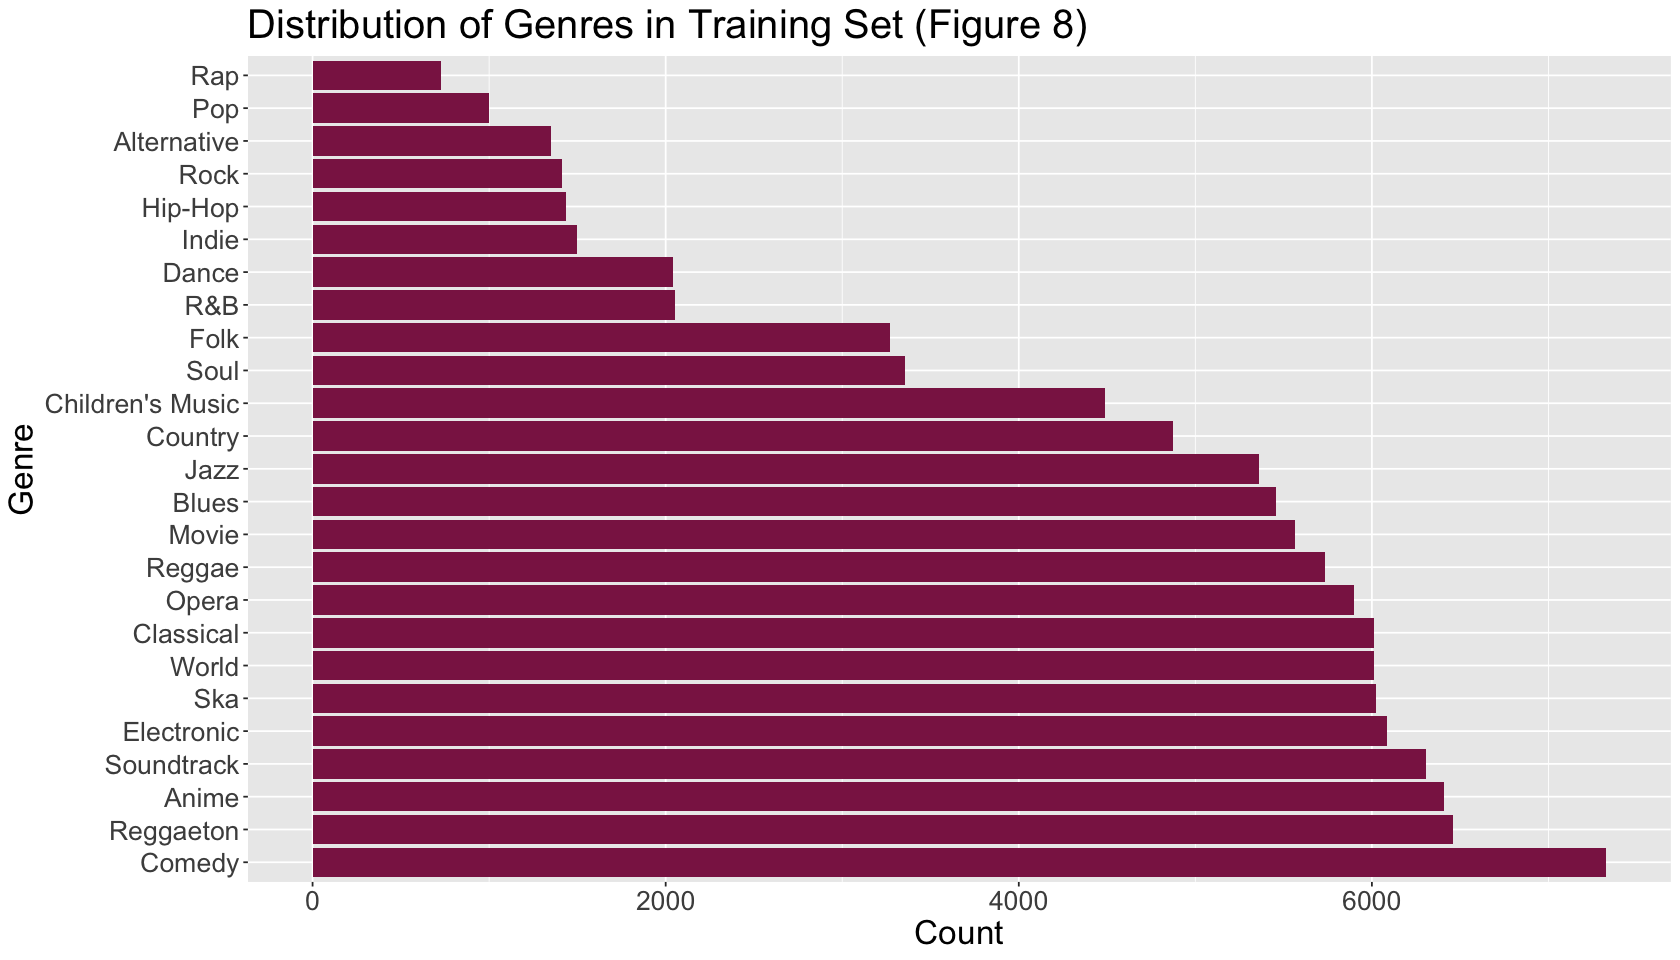

In [56]:
genre_dist_plot <- song_train |>
    group_by(genre) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count))+
        geom_bar(stat = "identity", fill = "violetred4")+
        labs(x = "Genre", y = "Count")+
        ggtitle("Distribution of Genres in Training Set (Figure 8)")+
        coord_flip()+
        theme(text = element_text(size = 20))

genre_dist_plot

## Methods

We will do classification using k-nearest neighbors, but to accurately predict these we will choose to remove variables that do not contribute anything useful for the model:

* Track_id: It is an identifier, has no predictive power
* Track_name: Does not help the model as having the same name does not represent anything special.  
* Artist_name: Having the same artist, does not guarantee you are going to have the same genre. We would also like our model to be able to predict genres for new artists to help them connect with new listeners 
* Popularity: We want to be able to predict genres for small/new artists, thus we will not use this as a predictor
* Liveness: Audience prescence in the song logically should not have bearing on its genre, as any song can be put into a concert and be classified as lively.  

In [ ]:
song_train<- song_train |>
            select(-track_id, -track_name, -artist_name, -popularity, -liveness)
song_train

We will then conduct a quick exploration of potential model accuracies using different subsets of these variables (seen below in variable selection). This is done to determine whether some predictors can be left out of the final model in order to (potentially) increase classification accuracy and simplify the model.

After this we will normalize and center all of the selected variables, as not all of them are measured under the same scale or centered around the same value. This is an especially important step when using k-NN models which are inherently distance based.

With the scaled and centered variables, we will tune for the number of neighbors (k) using mean accuracy scores obtained from 5-fold cross validation on the training data. Finally, we will create the finished model using the value of k that produced the highest mean accuracy for the training set. The final model will be evaluated against unseen songs in the test set.

## Variable Selection

Due to limited server resources and timeframe, we decided to explore 12 potential models (as opposed to doing full forward variable selection). These 12 models will be fitted and evaluated using a subset of the training data. Below we use the "initial_split" function again to simplify stratification by genre, however note that we do not intend to use the testing subset produced by this split.

In [125]:
song_split_mini <- initial_split(song_train, prop = 0.1, strata = genre)
song_train_mini <- training(song_split_mini)

print(nrow(song_train_mini))

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


[1] 10614


Please ignore the long list of warning messages that are produced from fitting these models. We believe that these are generated because the genre variable (which has data type factor) still contains the levels which were removed from the dataset in preprocessing.

In [127]:
#for loop for each variable
names = names(song_train_mini)
names<- names[-1]
formula= ""
df <- data.frame(formula = character(), description= character())
#First we will create the folds so we can cross validate to check for the best number of neighbors
    song_fold<-vfold_cv(song_train_mini, v=5, strata=genre)
#lets create the model
    song_model <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) |>
                set_engine("kknn") |>
                set_mode("classification")
#lets create k values 
neighbors = tibble(neighbors=seq(from=1, to=101, by=10))

for(name in names) {
    if(name=="acousticness") {
        formula = name
        result = paste0("genre ~", formula)
    }else {
        formula = paste0(formula, " + ", name)
        result = paste0("genre ~", formula)
    }
    
    #second we create the recipe
    song_recipe2<- song_train_mini |>
                recipe(as.formula(result)) |>
                step_scale(all_numeric())|>
                step_center(all_numeric())
   
    #lets create the fit
    song_fit<- workflow()|>
            add_recipe(song_recipe2) |>
            add_model(song_model) |>
            tune_grid(resamples= song_fold, grid=neighbors) |>
            collect_metrics() |>
            filter(.metric=="accuracy") |>
            arrange(desc(mean)) |>
            slice_head(n = 1) |>
            summarize(my_string = paste("neighbors:", neighbors, "accuracy =", round(mean, 4))) |>
            pull(my_string)
        print(paste("Formula used: ", result, "with  ",song_fit))
         df <- rbind(df, data.frame(formula = result, description = song_fit))
    }

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”
→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness with   neighbors: 101 accuracy = 0.1962"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability with   neighbors: 81 accuracy = 0.2539"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms with   neighbors: 61 accuracy = 0.2943"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy with   neighbors: 91 accuracy = 0.3389"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness with   neighbors: 81 accuracy = 0.3786"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key with   neighbors: 41 accuracy = 0.3594"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness with   neighbors: 51 accuracy = 0.3649"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode with   neighbors: 71 accuracy = 0.368"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode + speechiness with   neighbors: 71 accuracy = 0.3802"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode + speechiness + tempo with   neighbors: 81 accuracy = 0.3861"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode + speechiness + tempo + time_signature with   neighbors: 101 accuracy = 0.384"


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




[1] "Formula used:  genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode + speechiness + tempo + time_signature + valence with   neighbors: 71 accuracy = 0.3978"


In [132]:
options(repr.matrix.max.rows = 12)

df

formula,description
<chr>,<chr>
genre ~acousticness,neighbors: 101 accuracy = 0.1962
genre ~acousticness + danceability,neighbors: 81 accuracy = 0.2539
genre ~acousticness + danceability + duration_ms,neighbors: 61 accuracy = 0.2943
genre ~acousticness + danceability + duration_ms + energy,neighbors: 91 accuracy = 0.3389
genre ~acousticness + danceability + duration_ms + energy + instrumentalness,neighbors: 81 accuracy = 0.3786
genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key,neighbors: 41 accuracy = 0.3594
genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness,neighbors: 51 accuracy = 0.3649
genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode,neighbors: 71 accuracy = 0.368
genre ~acousticness + danceability + duration_ms + energy + instrumentalness + key + loudness + mode + speechiness,neighbors: 71 accuracy = 0.3802


We see that accuracy does not seem to increase from including the key or time_signature predictors. We understand that this is not a rigorous analysis of the features available, and given more time we would prefer to conduct a more thorough variable selection method (eg forward selection).

Below we investigate a model fitted with all predictors except for key and time_signature, that is:

$genre \sim acousticness + danceablility + duration\_ ms + energy + instrumentalness + loudness + mode + speechiness + tempo + valence$

In [134]:
song_fold<-vfold_cv(song_train_mini, v=5, strata=genre)

song_recipe<- song_train |>
                recipe(genre~acousticness+danceability+duration_ms+energy+instrumentalness+loudness+speechiness+mode+
                      tempo+valence) |>
                step_scale(all_numeric())|>
                step_center(all_numeric())


song_model <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

neighbors = tibble(neighbors=seq(1, 101, by=10))

song_fit <- suppressWarnings(workflow() |>
                add_recipe(song_recipe) |>
                add_model(song_model) |>
                tune_grid(resamples = song_fold, grid = neighbors) |>
                collect_metrics() |>
                filter(.metric == "accuracy"))

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”
→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




In [136]:
song_fit |> arrange(desc(mean)) |> slice(1)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,multiclass,0.4170903,5,0.001962606,Preprocessor1_Model03


We find that after removing key and time_signature as predictors, our model appears to achieve even higher accuracy than the one fitted with all available predictors. In fitting our final model, we will proceed with using all variables except key and time_signature (as shown above).

## Creating the Full k-NN Model

In [138]:
#First we will create the folds so we can cross validate to check for the best number of neighbors
song_fold<-vfold_cv(song_train, v=5, strata=genre)
#second we create the recipe
song_recipe<- song_train |>
                recipe(genre~acousticness+danceability+duration_ms+energy+instrumentalness+loudness+speechiness+mode+
                      tempo+valence) |>
                step_scale(all_numeric())|>
                step_center(all_numeric())
song_recipe
# create the model
song_model <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) |>
                set_engine("kknn") |>
                set_mode("classification")
song_model
# create k values 
neighbors = tibble(neighbors=seq(1, 101, by=10))
# create the fit
song_fit <- suppressWarnings(workflow() |>
                add_recipe(song_recipe) |>
                add_model(song_model) |>
                tune_grid(resamples = song_fold, grid = neighbors) |>
                collect_metrics() |>
                filter(.metric == "accuracy"))

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 10



── Operations 

• Scaling for: all_numeric()

• Centering for: all_numeric()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


→ A | warning: There were 11 warnings in `dplyr::summarise()`.
               The first warning was:
               ℹ In argument: `.estimate = metric_fn(...)`.
               ℹ In group 1: `neighbors = 1`.
               Caused by warning:
               ! No observations were detected in `truth` for level(s): 'A Capella', 'Children’s Music'
               Computation will proceed by ignoring those levels.
               ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5




neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
31,accuracy,multiclass,0.4533387,5,0.002083118,Preprocessor1_Model04


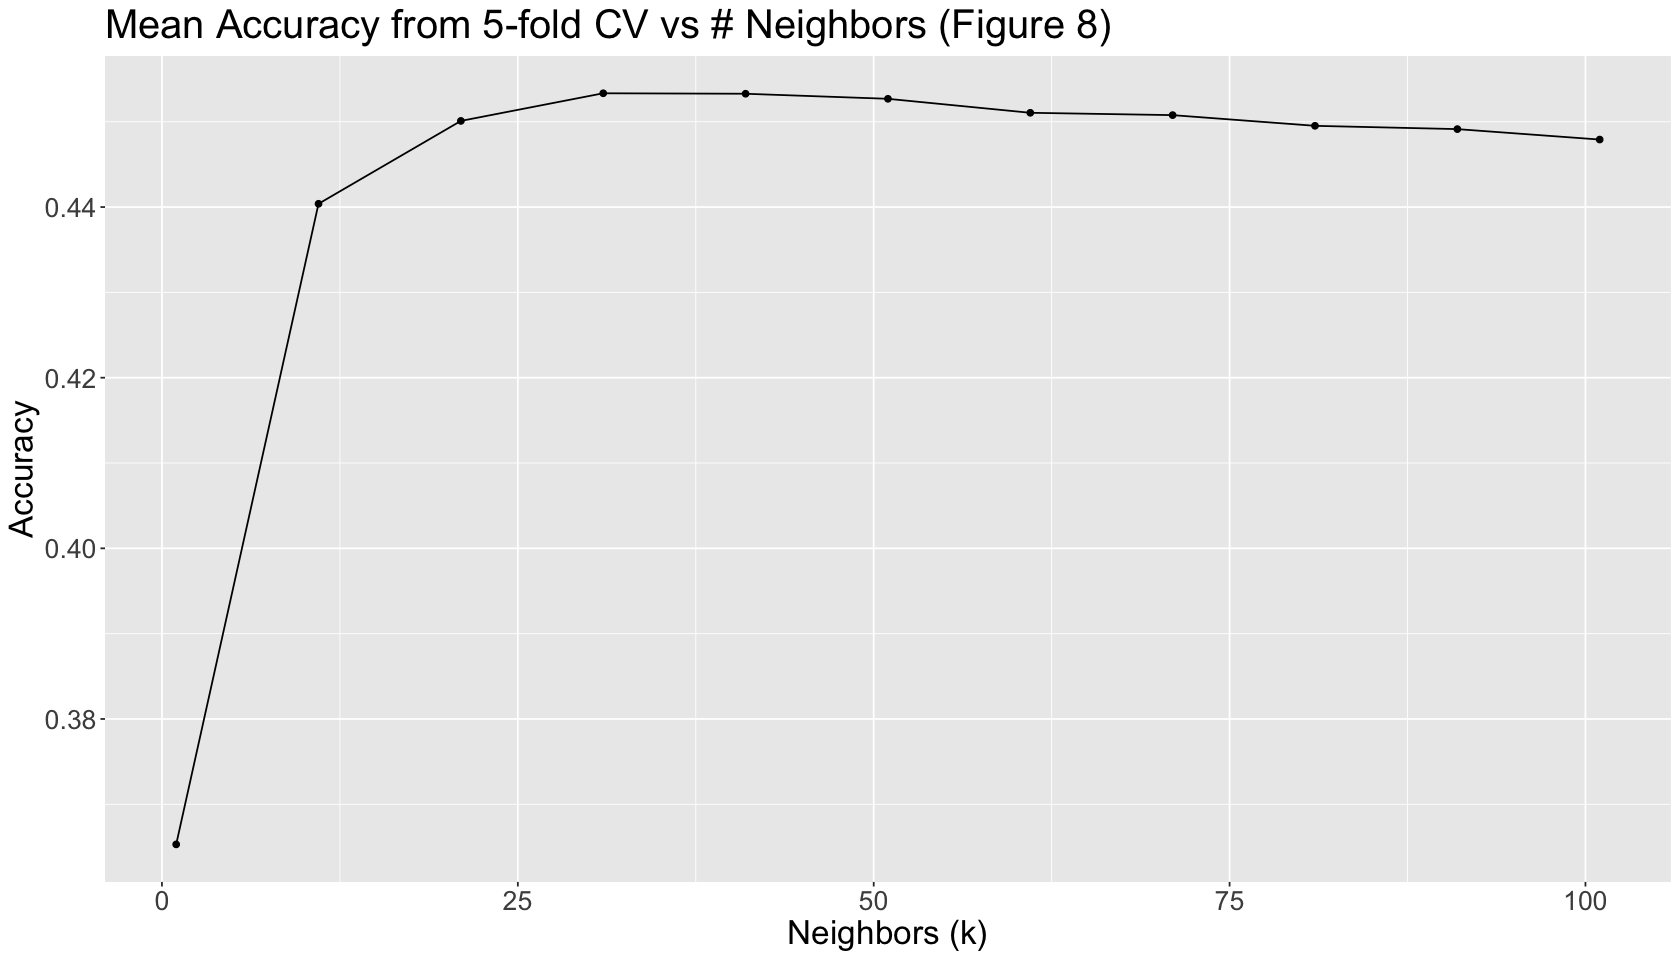

In [139]:
plot_of_neighbors<- song_fit|>
                    ggplot(aes(x=neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x="Neighbors (k)", y = "Accuracy") +
                    ggtitle("Mean Accuracy from 5-fold CV vs # Neighbors (Figure 8)")+
                    theme(text = element_text(size = 20))
plot_of_neighbors
best_neighbors<- song_fit |>
                arrange(desc(mean)) |>
                slice_head(n=1) 
best_neighbors

In [22]:
chosen_recipe<- song_train |>
                recipe(genre~.) |>
                step_scale(all_numeric()) |>
                step_center(all_numeric())

#lets create the model
chosen_model <- nearest_neighbor(weight_func="rectangular", neighbors=31) |>
                set_engine("kknn") |>
                set_mode("classification")

#lets create the fit
song_predictions <- workflow() |>
                add_recipe(chosen_recipe) |>
                add_model(chosen_model) |>
                fit(song_train) |>
                predict(song_test) |>
                bind_cols(song_test)


.pred_class,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
Classical,Movie,Richard M. Sherman,Keys of Love,0pXwl2CRP5awxHsF9eET3L,0,0.970,0.400,159253,0.174,9.33e-01,G,0.130,-13.869,Major,0.0458,115.022,4/4,0.270
Country,Movie,Bernard Minet,Ultra Man 80,0x8xSaoSfQkOYUnG1nbga0,3,0.488,0.744,178107,0.953,0.00e+00,E,0.453,-4.986,Major,0.0370,129.959,4/4,0.926
Country,Movie,Amalya,Ladies And Gentlemen,12ZjoNweObu1k9rK4SOSdL,4,0.161,0.522,207240,0.748,7.25e-06,C#,0.111,-5.203,Major,0.0824,184.063,4/4,0.733
Movie,Movie,Henri Salvador,Monsieur Boum Boum,14K25Ks5fdHjHfpIYOTc4y,8,0.689,0.704,161773,0.804,4.22e-02,C,0.180,-6.699,Major,0.1090,127.999,4/4,0.836
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Reggaeton,Children's Music,Benny The Butcher,Goodnight,466nP4Y55Qrs9KQ52La8wm,42,0.47000,0.681,201482,0.723,4.91e-06,C#,0.0901,-9.932,Major,0.4040,81.023,4/4,0.628
Country,Children's Music,Meredith Andrews,Not For a Moment (After All),0DLm6rzoQFEdOHL0EqVv3t,44,0.56900,0.413,240166,0.682,0.00e+00,D#,0.1500,-6.846,Major,0.0325,142.132,4/4,0.246
Folk,Children's Music,YUNGBLUD,Psychotic Kids - Unplugged,5oC1EoP1ohoS3k9d4LwVVQ,51,0.68300,0.486,175890,0.306,0.00e+00,D,0.1080,-7.828,Minor,0.0395,135.887,4/4,0.384
Country,Children's Music,The Revivalists,Some People Say,5a9JvYO69OCb9a1mOdVFZp,42,0.00253,0.502,251867,0.723,0.00e+00,A,0.2090,-5.505,Major,0.0390,80.961,4/4,0.614


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.435859


`summarise()` has grouped output by 'genre'. You can override using the
`.groups` argument.


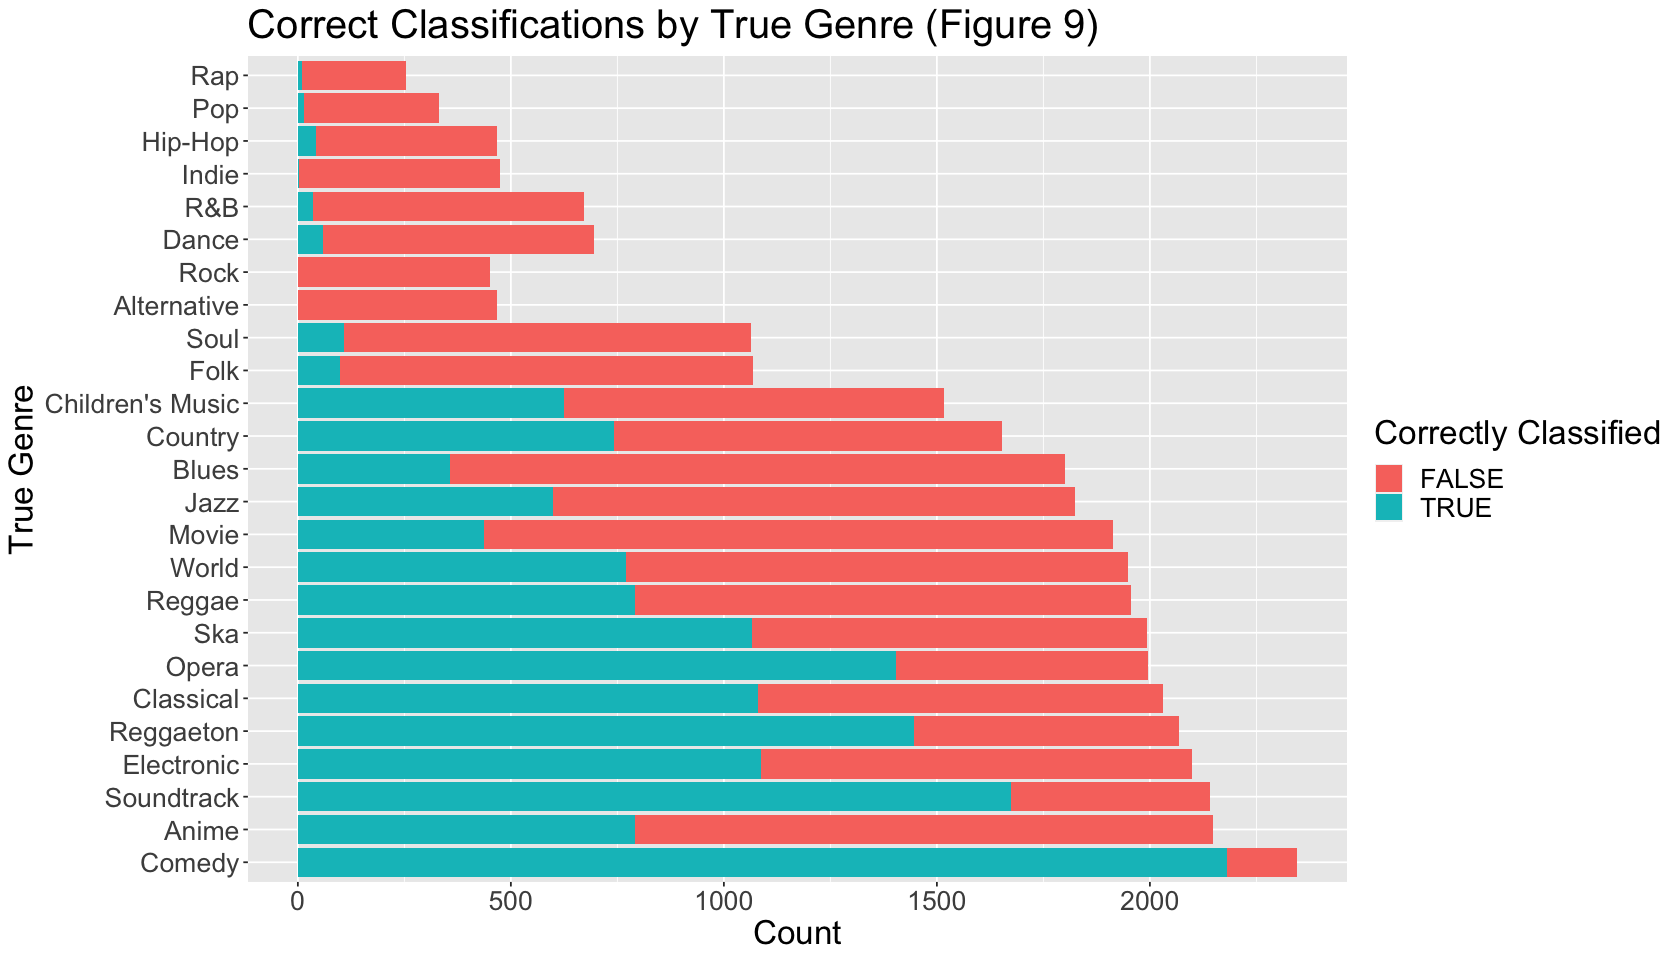

In [42]:
prediction_accuracy <- song_predictions |>
     metrics(truth=genre, estimate=.pred_class) |>
     filter(.metric=="accuracy")

prediction_accuracy

accuracy_plot <- song_predictions |>
    select(.pred_class, genre) |>
    mutate(correct = .pred_class == genre) |>
    group_by(genre, correct) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count, fill = correct)) +
        geom_bar(stat = "identity", position = "stack") +
        labs(x = "True Genre", y = "Count", fill = "Correctly Classified") +
        ggtitle("Correct Classifications by True Genre (Figure 9)") +
        theme(text = element_text(size = 20)) +
        coord_flip()
        

accuracy_plot

Our final model using k = 31 was able to predict the genres of unseen songs with an accuracy of 0.436. 

## Expected Outcomes + Significance

**What do you expect to find?**

From this analysis we expect to create a classification system that is able to accurately sort songs into a specific genre based on their audio features.

**What impact could such findings have?**

Creating and testing music genre classification models is extremely important for music streaming platforms, such as Spotify, whose song recommendation systems rely partially on “content-based filtering” (Pastukhov, 2022). Hence, by creating and optimizing a genre classifications system using content-based data, such as raw audio features, we can possibly improve song recommendations for users. Our classification model may also help improve artist discoverability,as according to Spotify, 33% of new artist discoveries happen via personalized music recommendations (“Learn How Fans”).

**What future questions could this lead to?**

* What features aside from audio features can be used to accurately classify music genres? For example, do songs that commonly appear in the same types of playlists have the same genre? If yes, can we use this playlist data to classify songs?
* How can these genre classifications be used to recommend new music to users?
* How effective are those music recommendations? Do users (survey data) like the music recommendation system?


## Discussion

### Summarize what you found:
- After testing our K Nearest Neighbour (KNN) classification model, we found it had a 43.6% accuracy in classifying songs to their correct music genre. This accuracy was achieved using a K value of 31. Of the genres tested, Comedy, Soundtrack, Reggaeton and Opera had the highest numbers of correct classifications, while genres such as Rock and Alternative has the lowest numbers of correct classifications.


### Discuss whether this is what you expected to find?
- Our expectation was to create a classification system that used audio features to accurately sort songs into their correct genre. Essentially, we expected to create a model that achieved an accuracy of > 50%, since other models that used KNN classifiers for music genre classification had achieved an accuracy of 61% (Tzanetakis & Cook, 2002, as cited in Chathuranga & Jayaratne, 2013, p. 14). The 43.6% accuracy that we achieved with our model, was not what we had initially expected to find.


## References

* Learn How Fans Discover Your Music on Spotify with New “Made to Be Found” Site and “Source of Streams” Stats – Spotify for Artists. (n.d.). Artists.spotify.com. Retrieved March 11, 2023, from https://artists.spotify.com/en/blog/how-fans-discover-music-on-spotify-playlists-made-to-be-found
* Pastukhov, D. (2022, February 9). Inside Spotify’s Recommender System: A Complete Guide to Spotify Recommendation Algorithms. Www.music-Tomorrow.com. https://www.music-tomorrow.com/blog/how-spotify-recommendation-system-works-a-complete-guide-2022
* Chathuranga, Y. M. D., & Jayaratne, K. L. (2013). Automatic Music Genre	Classification of Audio Signals with Machine Learning Approaches. GSTF International Journal on Computing (JoC Vol.3 No.2), 3(2). https://doi.org/10.5176/2251-3043_3.2.251